This is a notebook for generally testing code before putting it into a file

In [1]:
import whisper
import matplotlib.pyplot as plt
import torch
from nuts import SoftPromptModelWrapper
# from .src.decoder import EvilDecoder
NAME = "tiny.en"
model = whisper.load_model(NAME)

device = "cuda"


/home/jaydenfassett/miniconda3/envs/imperceptible/lib/python3.11/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load

In [2]:
import torch
import torchaudio
import torchvision
torch.cuda.is_available()

True

In [3]:
print(torch.__version__)  # Should output 2.5.1
print(torchaudio.__version__)  # Should output 2.5.1
print(torch.cuda.is_available())  # Should return True if CUDA is available

2.5.1
2.5.1
True


In [3]:
# if "en" in NAME:
#     tokenizer = whisper.tokenizer.get_tokenizer(multilingual=False)
# else:
#     tokenizer = whisper.tokenizer.get_tokenizer(multilingual=False)
tokenizer = whisper.tokenizer.get_tokenizer(multilingual=False)


In [4]:
q = tokenizer.encode("ass")
q.append(tokenizer.eot)
print(q)
tokenizer.decode(q)


[562, 50256]


'ass<|endoftext|>'

In [5]:
q = whisper.load_audio("original_audio.wav")
x = whisper.load_audio("audio_with_attack.wav")

def prep(x):
    x = whisper.pad_or_trim(x)
    mel = whisper.log_mel_spectrogram(x).to(model.device).unsqueeze(dim=0)
    return mel

mels = torch.cat((prep(q),prep(x)),dim=0)
# _, probs = model.detect_language(mel)
sot_tokens = torch.tensor(tokenizer.sot_sequence_including_notimestamps).unsqueeze(dim=1).to(device)

options = whisper.DecodingOptions(language="en")
# x1 = model.forward(mel,sot_tokens).argmax()
# q = torch.cat([sot_tokens,x1.reshape(1,1)])

# x1
# print(result)
# x = whisper.log_mel_spectrogram(x)
# qq = model.forward(x)c
# model.transcribe = transcribe


In [14]:
tokens = torch.zeros(size=(8,),dtype=torch.int64).to(device)

tokens[range(len(sot_tokens))] = sot_tokens.reshape(2)

In [ ]:
# tokens = torch.zeros(size=(5 + len(sot_tokens),),dtype=torch.int64)
# toketokens[range(len(sot_tokens))] = sot_tokens.reshape(2)

RuntimeError: unsupported operation: some elements of the input tensor and the written-to tensor refer to a single memory location. Please clone() the tensor before performing the operation.

In [8]:
dec = EvilDecoder(model,tokenizer,'cuda')

dec.autoregressive(prep(q),5)

RuntimeError: unsupported operation: some elements of the input tensor and the written-to tensor refer to a single memory location. Please clone() the tensor before performing the operation.

In [ ]:
qq = torch.zeros(10)
qq[range(2)] = 2
qq

tensor([2., 2., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
qq= model.forward(prep(x),sot_tokens)
qq
# tokenizer.decode([qq])

tensor([[[ 9.0000, 10.6302, 11.1252,  ..., 13.1562, 12.7054, 11.7319]],

        [[ 9.6183, 10.4183, 10.2130,  ..., 12.6447, 12.3603, 11.3263]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>)

In [ ]:
whisper.decode(model,mels,options)

tensor([6.5999e-05, 1.9931e-05], device='cuda:0')
tensor([1.3133e-06, 1.9123e-07], device='cuda:0')
tensor([2.0125e-10, 2.4536e-06], device='cuda:0')
tensor([4.6505e-09, 9.3662e-07], device='cuda:0')
tensor([2.5330e-11, 8.1701e-07], device='cuda:0')
tensor([2.4917e-09, 7.2481e-07], device='cuda:0')
tensor([5.0162e-08, 6.5271e-07], device='cuda:0')
tensor([8.8090e-08, 7.1568e-07], device='cuda:0')
tensor([2.0441e-07, 8.1281e-07], device='cuda:0')
tensor([3.4646e-07, 1.0257e-06], device='cuda:0')
tensor([4.3251e-06, 1.6089e-06], device='cuda:0')
tensor([2.1095e-08, 1.6510e-06], device='cuda:0')
tensor([4.9703e-07, 2.6171e-06], device='cuda:0')
tensor([6.9143e-05, 2.8089e-06], device='cuda:0')
tensor([2.7708e-06, 3.7516e-06], device='cuda:0')
tensor([2.0743e-08, 4.2640e-06], device='cuda:0')
tensor([3.9939e-09, 3.0686e-06], device='cuda:0')
tensor([2.3187e-07, 3.2898e-06], device='cuda:0')
tensor([2.1472e-08, 1.8306e-06], device='cuda:0')
tensor([8.9811e-10, 2.3765e-06], device='cuda:0')


[DecodingResult(audio_features=tensor([[-1.0557, -0.3167,  0.2725,  ..., -1.4014,  0.0627, -0.5405],
         [-0.4219,  0.2426,  0.6577,  ..., -1.8467, -0.0460, -0.0558],
         [ 0.3931,  0.3206,  1.4346,  ..., -2.2773, -0.5181, -0.4744],
         ...,
         [ 0.0134,  0.0706,  0.0286,  ...,  0.0865,  0.0698,  0.0347],
         [ 0.4673, -0.0786, -1.0449,  ...,  0.1683,  0.6689,  0.2416],
         [-0.1725,  0.1504, -0.6147,  ...,  0.5283,  0.5952,  0.0034]],
        device='cuda:0', dtype=torch.float16), language='en', language_probs=None, tokens=[50363, 383, 11742, 286, 777, 24770, 7466, 883, 1043, 287, 18922, 286, 5676, 17252, 618, 50651, 50651, 3688, 416, 30624, 5444, 45943, 11081, 11, 19446, 4663, 13, 50883], text='The composition of these crystals matches those found in urine of affected pets when compared by infrared spectroscopy, FTIR.', avg_logprob=-0.2614887171778186, no_speech_prob=0.04091791436076164, temperature=0.0, compression_ratio=1.1904761904761905),
 DecodingR

In [ ]:
print("Decoded text:",tokenizer.decode([50364, 440, 12686, 295, 613, 23772, 10676, 729, 1352, 294, 27638, 295, 8028, 19897, 562, 5347, 50684, 50684, 538, 30361, 6177, 38006, 88, 11, 479, 5422, 49, 13, 50884]))

Decoded text:  O Harperion pe constructorardedaterator th herdion courtsariusass ingep Recommend ONtany, k mouthR.


In [ ]:
tokenizer.eot

50256

In [ ]:
# torch.cat([sot_tokens,x1.reshape(1,1)])

In [ ]:
[0]
# qq.audio_features
# qq

[0]

In [ ]:
mel.shape

torch.Size([1, 80, 3000])

In [ ]:
plt.imshow(qq.audio_features.detach().cpu().numpy())

AttributeError: type object 'SoftPromptModelWrapper' has no attribute 'audio_features'

In [ ]:
model.transcribe(model=model,audio=x)

TypeError: transcribe() got multiple values for argument 'model'

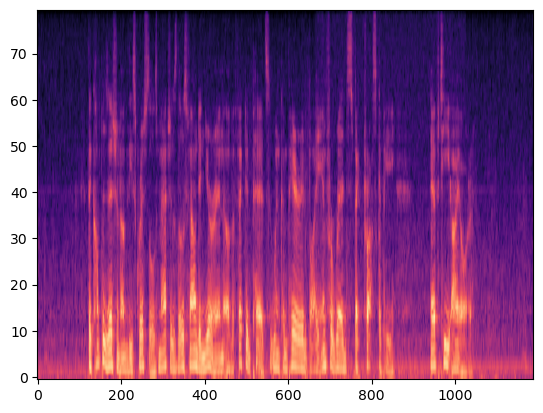

In [ ]:
arr = x.numpy()


arr.shape
plt.imshow(arr, aspect='auto',origin='lower',cmap="magma")

